## Youtube Sentiment Analysis

## 1.Importing the datasets

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 200)

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style ="whitegrid", color_codes=True)
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import warnings
warnings.filterwarnings("ignore")

## 2. Importing the datasets

In [2]:
df_comments=pd.read_csv('/content/UScomments.csv', quoting=csv.QUOTE_NONE, on_bad_lines='skip')
df_comments=df_comments[:10000]
df_comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,"""Logan Paul it's yo big day ‼️‼️‼️""",4,0
1,XpVt6Z1Gjjo,"""I've been following you from the start of your vine channel and have seen all 365 vlogs""",3,0
2,XpVt6Z1Gjjo,"""Say hi to Kong and maverick for me""",3,0
3,XpVt6Z1Gjjo,"""MY FAN . attendance""",3,0
4,XpVt6Z1Gjjo,"""trending 😉""",3,0


## 3. Exploratory Data Analysis

In [3]:
df_comments.shape

(10000, 4)

In [4]:
df_comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [5]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   video_id      10000 non-null  object
 1   comment_text  10000 non-null  object
 2   likes         10000 non-null  object
 3   replies       10000 non-null  object
dtypes: object(4)
memory usage: 312.6+ KB


## 4. Data Mining and Preparation

In [6]:
df_comments.dropna(inplace=True)
df_comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [7]:
df_comments[0:]['likes']

0       4
1       3
2       3
3       3
4       3
       ..
9995    0
9996    0
9997    0
9998    0
9999    1
Name: likes, Length: 10000, dtype: object

In [8]:
df_comments['likes'][0]

'4'

## 5. Filtering and Analyzing data

In [9]:
df_comments['comment_text'] = df_comments['comment_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [10]:
df_comments

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,"""Logan Paul it's ‼️‼️‼️""",4,0
1,XpVt6Z1Gjjo,"""I've been following from start your vine channel have seen vlogs""",3,0
2,XpVt6Z1Gjjo,"""Say Kong maverick",3,0
3,XpVt6Z1Gjjo,"attendance""",3,0
4,XpVt6Z1Gjjo,"""trending",3,0
...,...,...,...,...
9995,WAwRqecvMSY,"""OMG THAT'S CONNOR YOUTUBER NEXT YOU. AHHH""",0,0
9996,WAwRqecvMSY,"""how fuck don't know Danielle? savage like you😂""",0,0
9997,WAwRqecvMSY,"""When doesn't know Connor Franta is...""",0,0
9998,WAwRqecvMSY,"""You should those hairy selfie nails""",0,0


In [11]:
arr_comments=[]
for i in df_comments['comment_text']:
  arr_comments.append(i)
print(len(arr_comments))

10000


In [12]:
tricky_sentences=[]
simple_sentences=[]

In [13]:
for i in arr_comments:
  if("." in i or "," in i or "?" in i or "'" in i or "-" in i or ":" in i or ";" in i or "!" in i):
    tricky_sentences.append(i)
  else:
    simple_sentences.append(i)

In [14]:
print(len(tricky_sentences))
print(len(simple_sentences))

6023
3977


## 6. Analyzing Data with Explorative Analysis and Data Plotting 

In [15]:
df_tricky_simp=pd.DataFrame()
df_tricky_simp["Tricky_Comments"] = tricky_sentences[:3977]
df_tricky_simp["Simple_Comments"] = simple_sentences

In [16]:
df_tricky_simp

,Tricky_Comments,Simple_Comments
0,"""Logan Paul it's ‼️‼️‼️""","""Say Kong maverick"
1,"""I've been following from start your vine channel have seen vlogs""","attendance"""
2,"trending!!!!!!!!!""","""trending"
3,"""You your shit brother have single handedly ruined YouTube.....thanks...""","trending AYYEEEEE"""
4,"""There should mini Logan Paul too!""","""The though 😭👍🏻❤️"""
...,...,...
3972,"""CANT FAULT!!!!! NOOOOO! IT'S EVERYONE ELSE'S FAULT! BECUZ SEXIZM!!!""","nails suck have habit when anxious bite nails side them"""
3973,"""Alternate nostril breathing... Like jamming Cocaine your nose?""","have nails LMAAAAAAAAAO"""
3974,"""SHUT \nSHUT UP!\nSHUT UP!""","""Simplysavagelogical needs have channel"
3975,"""HAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHA!""","""You should those hairy selfie nails"""


In [17]:
Data_Mixed = pd.concat([df_tricky_simp["Tricky_Comments"],df_tricky_simp["Simple_Comments"]])
print(Data_Mixed)
counter=[]
for i in Data_Mixed:
  x=i.split(' ')
  counter.append(len(x))
print(len(counter))

0                                                        "Logan Paul it's ‼️‼️‼️"
1              "I've been following from start your vine channel have seen vlogs"
2                                                              trending!!!!!!!!!"
3       "You your shit brother have single handedly ruined YouTube.....thanks..."
4                                             "There should mini Logan Paul too!"
                                          ...                                    
3972                     nails suck have habit when anxious bite nails side them"
3973                                                     have nails LMAAAAAAAAAO"
3974                                      "Simplysavagelogical needs have channel
3975                                        "You should those hairy selfie nails"
3976                                                              "Omg love this"
Length: 7954, dtype: object
7954


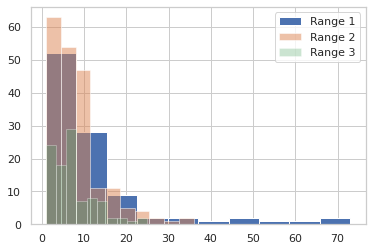

In [18]:
plt.hist(counter[0:100])
plt.hist(counter[100:300],alpha=0.5)
plt.hist(counter[300:400],alpha=0.3)
plt.legend(labels=('Range 1','Range 2','Range 3'))
plt.savefig('Plot E')
plt.show()

In [19]:
likes=[]
replies=[]
for i in range(len(df_comments['likes'])):
  try:
    likes.append((int)(df_comments['likes'][i]))
  except:
    likes.append(0)
for i in range(len(df_comments['replies'])):
  try:
    replies.append((int)(df_comments['replies'][i]))
  except:
    replies.append(0)   
# print(replies)

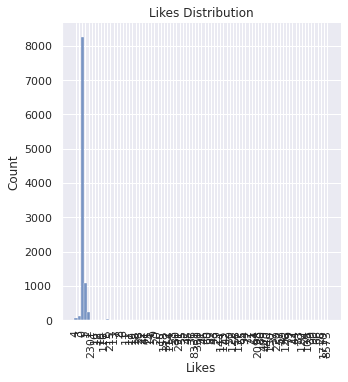

In [20]:
sns.set(rc={'figure.figsize':(11, 8)})
sns.displot(df_comments['likes'], bins=20)
plt.xlabel('Likes')
plt.xticks(rotation=90)
plt.title('Likes Distribution')
plt.savefig('Plot Likes Original')
plt.show()

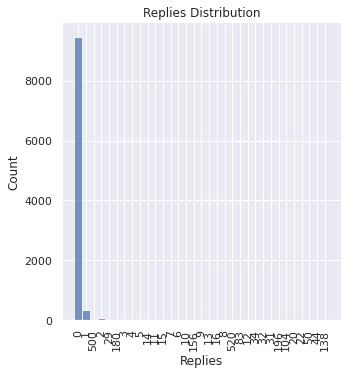

In [21]:
sns.set(rc={'figure.figsize':(11, 8)})
sns.displot(df_comments['replies'], bins=20)
plt.xlabel('Replies')
plt.xticks(rotation=90)
plt.title('Replies Distribution')
plt.savefig('Plot Replies Original')
plt.show()

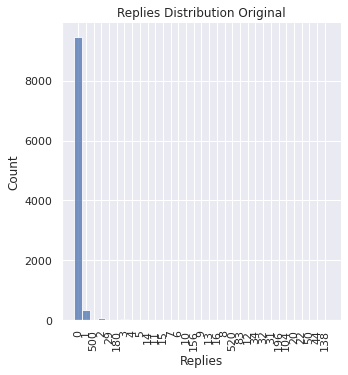

In [22]:
sns.displot(df_comments['replies'], bins=50)
plt.xlabel('Replies')
plt.xticks(rotation=90)
plt.title('Replies Distribution Original')
plt.savefig('Plot Replies Original')
plt.show()

In [23]:
df_likes_repl=pd.DataFrame()
df_likes_repl['Replies']=[i for i in replies if i!=0]
ind_repl=[j for j in range(len(likes)) if replies[j]!=0]
arr_likes=[]
for k in ind_repl:
  arr_likes.append(likes[k])
df_likes_repl['Likes']=arr_likes
df_likes_repl

,Replies,Likes
0,1,0
1,500,2301
2,2,0
3,1,16
4,1,2
...,...,...
535,2,6
536,5,7
537,1,5
538,1,8


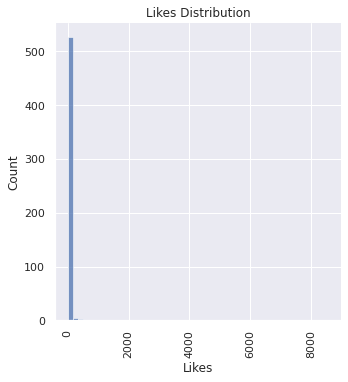

In [24]:
sns.displot(df_likes_repl['Likes'], bins=50)
plt.xlabel('Likes')
plt.xticks(rotation=90)
plt.title('Likes Distribution')
plt.savefig('Plot Likes')
plt.show()

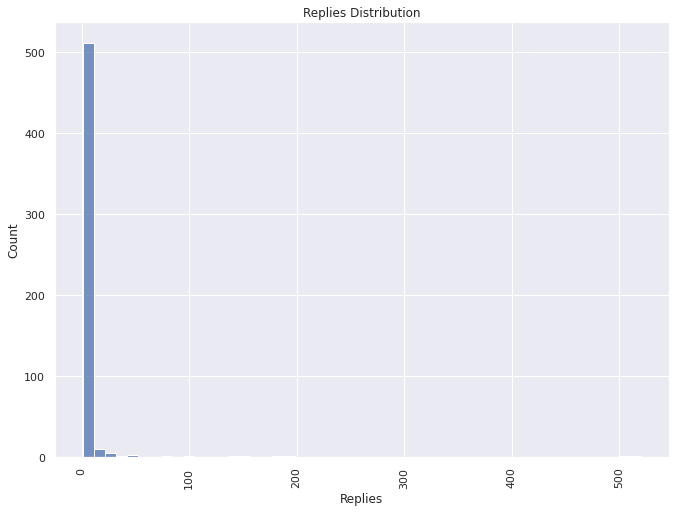

In [25]:
sns.histplot(df_likes_repl['Replies'], bins=50)
plt.xlabel('Replies')
plt.xticks(rotation=90)
plt.title('Replies Distribution')
plt.savefig('Plot Replies')
plt.show()

## 7. Defining 2 different types of sentences

In [26]:
tricks=[]
simples=[]
for i in tricky_sentences:
  tricks.append(i.split(' '))
for j in simple_sentences:
  simples.append(j.split(' '))

In [27]:
print(len(tricks))
print(len(simples))

6023
3977


In [28]:
n_instances = 3977
split_tricky = [(i, 'trick') for i in tricks[:n_instances]] #mostly with punction
split_simple = [(j, 'simple') for j in simples[:n_instances]] #small number of punctuations

In [29]:
print(len(split_tricky))
print(split_simple)


3977
[(['"Say', 'Kong', 'maverick'], 'simple'), (['attendance"'], 'simple'), (['"trending'], 'simple'), (['trending', 'AYYEEEEE"'], 'simple'), (['"The', 'though', '😭👍🏻❤️"'], 'simple'), (['"Happy', 'year', 'vlogaversary"'], 'simple'), (['"Casey', 'still', 'better', 'then', 'logan"'], 'simple'), (['happy', 'cause', 'movie"'], 'simple'), (['"Bro', 'didnt', 'give', 'merch', 'johannes'], 'simple'), (['"Made', 'people', 'hate', 'youtube'], 'simple'), (['"Jake', 'Paul', 'fastest', 'growing', 'channel', 'Million', 'thats', 'fact', 'dont', 'want', 'believe', 'that', 'then', 'just', 'away"'], 'simple'), (['"You', 'should', 'prank', 'that', 'broke', 'your', 'play', 'puttun"'], 'simple'), (['love', 'Logan', 'Jake', 'much', 'thay', 'amazing', 'look', 'them', 'much', '😍💋💙👍"'], 'simple'), (['"Evan', 'being', 'such', 'dick', 'this', 'vlog"'], 'simple'), (['"Evan', 'horrible', 'human', 'being', 'also', 'looks', 'jealous', 'when', 'open', 'like', 'should', 'happy', 'you"'], 'simple'), (['love', 'much', 

## 8. Creating train and test data

In [30]:
train_tricks=split_tricky[:3182]
test_tricks=split_tricky[3182:3977]
train_simple=split_simple[:3182]
test_simple=split_simple[3182:3977]
train_sample=train_simple+train_tricks
test_sample=test_simple+test_tricks

## 9. Adding Unigram Analysis to negative marked data

In [31]:
sentim_analyzer=SentimentAnalyzer()
all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in train_sample])

In [32]:
unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
print(len(unigram_feats))
sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)

1203


## 10. Training model and Classifying

In [33]:
training_set = sentim_analyzer.apply_features(train_sample)
test_set = sentim_analyzer.apply_features(test_sample)

In [34]:
trainer = NaiveBayesClassifier.train
classifier = sentim_analyzer.train(trainer, training_set)

Training classifier


In [36]:
classifier.classify(test_set[0][0])

'simple'

In [37]:
training_set

[({'contains(nigger)': False, 'contains(this)': False, 'contains(that)': False, 'contains(like)': False, 'contains(with)': False, 'contains(your)': False, 'contains(have)': False, 'contains(love)': False, 'contains(just)': False, 'contains("This)': False, 'contains(they)': False, 'contains(from)': False, 'contains(about)': False, 'contains("The)': False, 'contains(video)': False, 'contains(when)': False, 'contains(looks)': False, 'contains(people)': False, 'contains(that_NEG)': False, 'contains(make)': False, 'contains("You)': False, 'contains(will)': False, 'contains(look)': False, 'contains(would)': False, 'contains(really)': False, 'contains(more)': False, 'contains(should)': False, 'contains(what)': False, 'contains(only)': False, "contains(don't)": False, 'contains(some)': False, 'contains("What)': False, 'contains(good)': False, 'contains("Why)': False, 'contains(still)': False, 'contains(know)': False, 'contains(think)': False, 'contains(than)': False, 'contains(much)': False, '

In [38]:
classifier.classify(training_set[0][0])

'simple'

## 11. Evaluating model for accuracy

In [39]:
for key,value in sorted(sentim_analyzer.evaluate(test_set).items()):
  print('{0}: {1}'.format(key, value))

Evaluating NaiveBayesClassifier results...
Accuracy: 0.6698113207547169
F-measure [simple]: 0.715755278830536
F-measure [trick]: 0.6061515378844711
Precision [simple]: 0.6283269961977186
Precision [trick]: 0.7509293680297398
Recall [simple]: 0.8314465408805032
Recall [trick]: 0.5081761006289308


## 12. Importing more libraries

In [40]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 13. Using nltk for polarizing and tokenizing words

In [41]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## 14. Calculated negative, positive and neutral datasets

In [42]:
tricky_set=tricky_sentences[0:1000]
ss_tricky=[]
sid = SentimentIntensityAnalyzer()
for sentence in tricky_set:
  ss_tricky.append(sid.polarity_scores(sentence))
print(ss_tricky)

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.489, 'neu': 0.511, 'pos': 0.0, 'compound': -0.7717}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.301, 'neu': 0.291, 'pos': 0.408, 'compound': 0.4922}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.2263}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.431, 'pos': 0.569, 'compound': 0.7861}, {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.236, 'neu': 0.308, 'pos': 0.456, 'compound': 0.6486}, {'neg': 0.133, 'neu': 0.664, 'pos': 0.204, 'compound': 0.4456}, {'neg': 0.136, 'neu': 0.691, 'pos': 0.173, 'compound': 0.1376}, {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.4

In [43]:
len(ss_tricky)

1000

In [44]:
count_positive=0
count_neutral=0
count_negative=0

## 15. Counting the 3 kinds of polarized values of sentences

In [45]:
tricky_simple_comments=pd.DataFrame()
tricky_simple_comments['Tricky_Sentences']=tricky_sentences[:1000]
points_df=pd.DataFrame(ss_tricky)
tricky_simple_comments['pos_tr']=0.0
tricky_simple_comments['neu_tr']=0.0
tricky_simple_comments['neg_tr']=0.0
for i in range(len(tricky_simple_comments)):
  tricky_simple_comments['pos_tr'][i]=points_df['pos'][i]
for i in range(len(tricky_simple_comments)):
  tricky_simple_comments['neu_tr'][i]=points_df['neu'][i]
for i in range(len(tricky_simple_comments)):
  tricky_simple_comments['neg_tr'][i]=float(points_df['neg'][i])

In [46]:
tricky_simple_comments

,Tricky_Sentences,pos_tr,neu_tr,neg_tr
0,"""Logan Paul it's ‼️‼️‼️""",0.000,1.000,0.000
1,"""I've been following from start your vine channel have seen vlogs""",0.000,1.000,0.000
2,"trending!!!!!!!!!""",0.000,1.000,0.000
3,"""You your shit brother have single handedly ruined YouTube.....thanks...""",0.000,0.511,0.489
4,"""There should mini Logan Paul too!""",0.000,1.000,0.000
...,...,...,...,...
995,"""sure wasnt just cartel?""",0.434,0.566,0.000
996,"""Hurricane Earma.""",0.000,1.000,0.000
997,"hate hurricane Harvey hurricane Irma.""",0.000,0.519,0.481
998,"""Hurricane Earma?""",0.000,1.000,0.000


In [47]:
count_negative_t=0
count_positive_t=0
count_neutral_t=0

In [48]:
for i in ss_tricky:
  if(i['neg']>i['pos'] and i['neg']>i['neu']):
    count_negative_t+=1
  if(i['pos']>i['neg'] and i['pos']>i['neu']):
    count_positive_t+=1
  if(i['neu']>i['pos'] and i['neu']>i['neg']):
    count_neutral_t+=1

In [49]:
print(count_negative_t)
print(count_neutral_t)
print(count_positive_t)

64
785
148


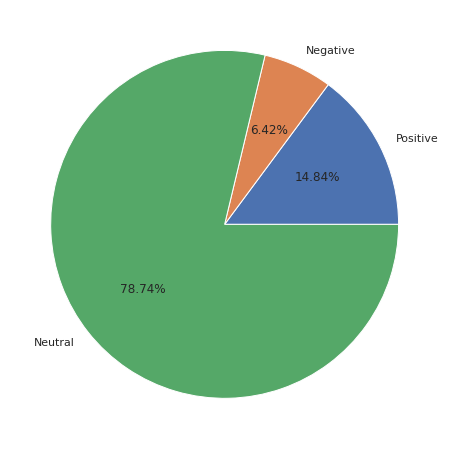

In [50]:
plt.figure(figsize=(8,8))
plt.pie([count_positive_t,count_negative_t,count_neutral_t],labels=('Positive','Negative','Neutral'),autopct='%.2f%%')
plt.savefig('Plot 3')
plt.show()

In [51]:
ss_simple=[]
tricky_set=simple_sentences[0:1000]
sid = SentimentIntensityAnalyzer()
for sentence in tricky_set:
  ss_simple.append(sid.polarity_scores(sentence))
print(ss_simple)

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.4767}, {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}, {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}, {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.552, 'neu': 0.448, 'pos': 0.0, 'compound': -0.5719}, {'neg': 0.077, 'neu': 0.816, 'pos': 0.107, 'compound': 0.1225}, {'neg': 0.25, 'neu': 0.536, 'pos': 0.214, 'compound': -0.1027}, {'neg': 0.0, 'neu': 0.438, 'pos': 0.562, 'compound': 0.9584}, {'neg': 0.398, 'neu': 0.602, 'pos': 0.0, 'compound': -0.5106}, {'neg': 0.3, 'neu': 0.415, 'pos': 0.286, 'compound': -0.0772}, {'neg': 0.0, 'neu': 0.432, 'pos': 0.568, 'compound': 0.9775}, {'neg': 0.0, 'neu': 0.519, 'pos': 0.48

In [52]:
count_negative_s=0
count_positive_s=0
count_neutral_s=0

In [53]:
for i in ss_simple:
  if(i['neg']>i['pos'] and i['neg']>i['neu']):
    count_negative_s+=1
  if(i['pos']>i['neg'] and i['pos']>i['neu']):
    count_positive_s+=1
  if(i['neu']>i['pos'] and i['neu']>i['neg']):
    count_neutral_s+=1

In [54]:
tricky_simple_comments['Simple_Sentences']=simple_sentences[:1000]
points_df=pd.DataFrame(ss_simple)
tricky_simple_comments['pos_sim']=0.0
tricky_simple_comments['neu_sim']=0.0
tricky_simple_comments['neg_sim']=0.0
for i in range(len(tricky_simple_comments)):
  tricky_simple_comments['pos_sim'][i]=points_df['pos'][i]
for i in range(len(tricky_simple_comments)):
  tricky_simple_comments['neu_sim'][i]=points_df['neu'][i]
for i in range(len(tricky_simple_comments)):
  tricky_simple_comments['neg_sim'][i]=points_df['neg'][i]

In [55]:
print(count_negative_s)
print(count_neutral_s)
print(count_positive_s)

105
656
225


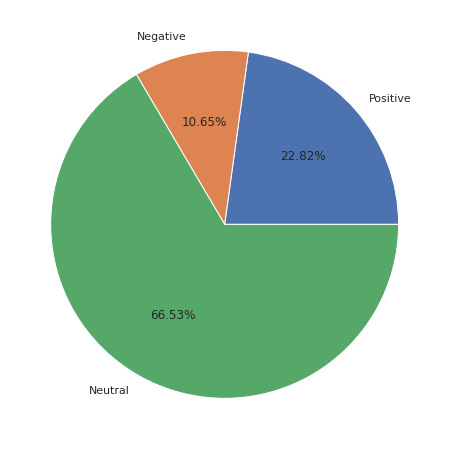

In [56]:
plt.figure(figsize=(8,8))
plt.pie([count_positive_s,count_negative_s,count_neutral_s],labels=('Positive','Negative','Neutral'),autopct='%.2f%%')
plt.savefig('Plot 4')
plt.show()

In [57]:
count_negative=count_negative_s+count_negative_t
count_positive=count_positive_s+count_positive_t
count_neutral=count_neutral_s+count_neutral_t

In [58]:
print('Total negative comments: ',count_negative)
print('Total positive comments: ',count_positive)
print('Total neutral comments: ',count_neutral)

Total negative comments:  169
Total positive comments:  373
Total neutral comments:  1441


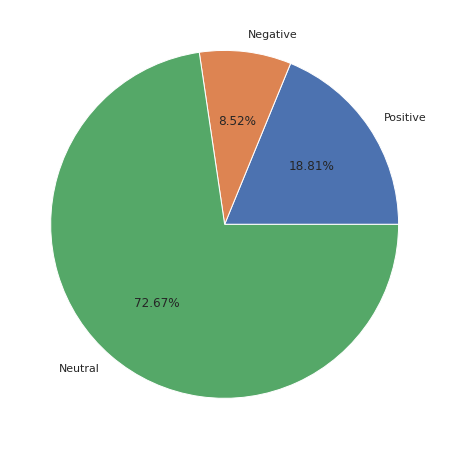

In [59]:
plt.figure(figsize=(8,8))
plt.pie([count_positive,count_negative,count_neutral],labels=('Positive','Negative','Neutral'),autopct='%.2f%%')
plt.savefig('Plot 5')
plt.show()

## 16. Plotting WordClouds for the datasets

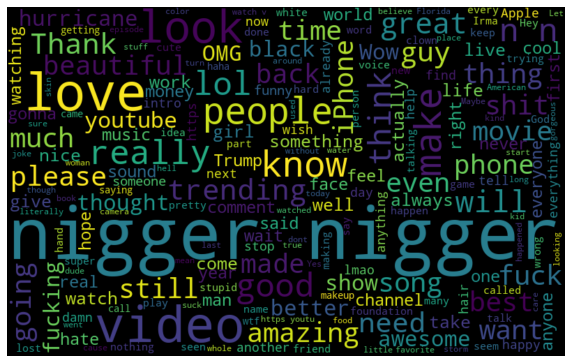

In [60]:
all_words = ' '.join([text for text in df_comments['comment_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [61]:
tricky_simple_comments

,Tricky_Sentences,pos_tr,neu_tr,neg_tr,Simple_Sentences,pos_sim,neu_sim,neg_sim
0,"""Logan Paul it's ‼️‼️‼️""",0.000,1.000,0.000,"""Say Kong maverick",0.000,1.000,0.00
1,"""I've been following from start your vine channel have seen vlogs""",0.000,1.000,0.000,"attendance""",0.000,1.000,0.00
2,"trending!!!!!!!!!""",0.000,1.000,0.000,"""trending",0.000,1.000,0.00
3,"""You your shit brother have single handedly ruined YouTube.....thanks...""",0.000,0.511,0.489,"trending AYYEEEEE""",0.000,1.000,0.00
4,"""There should mini Logan Paul too!""",0.000,1.000,0.000,"""The though 😭👍🏻❤️""",0.000,0.780,0.22
...,...,...,...,...,...,...,...,...
995,"""sure wasnt just cartel?""",0.434,0.566,0.000,"""AMAZING lol""",1.000,0.000,0.00
996,"""Hurricane Earma.""",0.000,1.000,0.000,"""Makeup goals",0.000,1.000,0.00
997,"hate hurricane Harvey hurricane Irma.""",0.000,0.519,0.481,"""That highlight",0.706,0.294,0.00
998,"""Hurricane Earma?""",0.000,1.000,0.000,"""That paper looks straight purple",0.322,0.678,0.00


In [62]:
all_tricky_words_neu = ''.join([text for text in tricky_simple_comments[tricky_simple_comments['neu_tr'] > 0]['Tricky_Sentences']])

In [63]:
all_tricky_words_neu

'"Logan Paul it\'s ‼️‼️‼️""I\'ve been following from start your vine channel have seen vlogs"trending!!!!!!!!!""You your shit brother have single handedly ruined YouTube.....thanks...""There should mini Logan Paul too!""Honestly Evan annoying. Like funny watching famous he\'s trying hard don\'t likegeez rick this face YouTube.""It\'s been watching grow. days straight can\'t seem grow. advice?"HONEY NOOO can\'t believe almost mili year damnn"Trending let\'s go."allot diss likes comments? lets diss like this please"watch clicking here people\'s entertaining""Logan\'s life from England""Gotta love Youtube giving morons ability earn buck from other morons.""Can Pauls please stop saying they\'re fastest growing YouTube channels?! That\'s PewDiePie\'s position!! made managed subscribers guys have MONTHS!!! that hard understand?!""Why trump trending YouTube wait this isn\'t trump sure looks like tho"subscribed today. This only second video I\'ve watched idea year special.""Ok. would. What edi

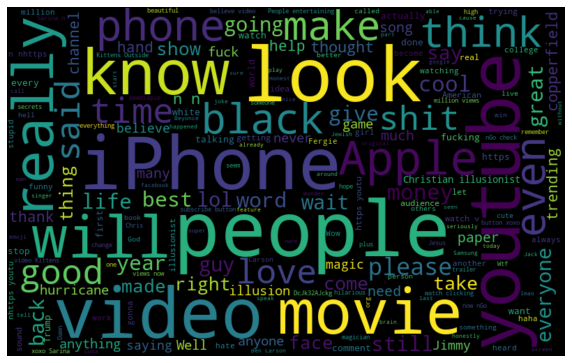

In [64]:
wordcloud_neu = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_tricky_words_neu)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neu, interpolation="bilinear")
plt.axis('off')
plt.show()

In [65]:
all_tricky_words_neg = ' '.join([text for text in tricky_simple_comments[tricky_simple_comments['neg_tr'] > 0]['Tricky_Sentences']])

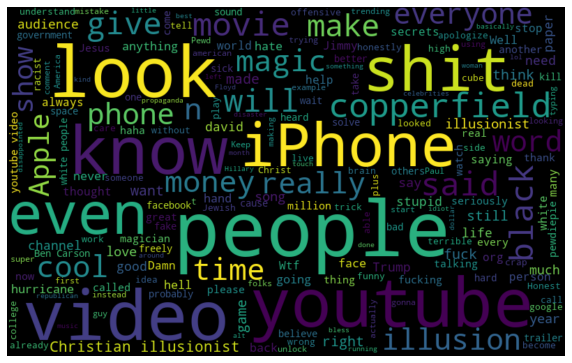

In [66]:
wordcloud_neg = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_tricky_words_neg)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis('off')
plt.show()